In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

2023-06-09 20:41:09.695699: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-09 20:41:09.699850: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 20:41:09.786834: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 20:41:09.787854: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 20:41:11.095370: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
print(X_train.shape)

(112, 4)

In [6]:
#classifier
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=[4,]),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(3) # 3가지 품종을 예측해야 하기 때문에 3개를 줘야한다.
                          # linear에서는 예측해야하는 값이 1개이기 때문에 1이다.
])

model.compile(optimizer='adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs = 50)

2023-06-09 20:44:29.426671: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-09 20:44:29.428310: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
4/4 [==============================] - 1s 6ms/step - loss: 1.4030 - accuracy: 0.0000e+00
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.2961 - accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 1.2355 - accuracy: 0.0625
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 1.1864 - accuracy: 0.3393
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 1.1468 - accuracy: 0.3393
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 1.1084 - accuracy: 0.3393
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0707 - accuracy: 0.3393
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0330 - accuracy: 0.3393
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9965 - accuracy: 0.3393
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9630 - accuracy: 0.6875
Epoch 11/50
4/4 [==============

In [7]:
print(h)

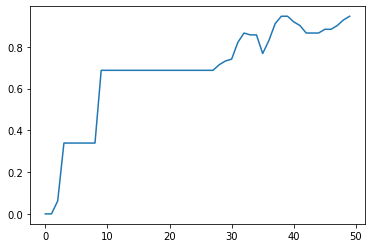

In [9]:
import matplotlib.pyplot as plt

_, axe = plt.subplots()
axe.plot(h.history['accuracy'])